In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import h5py
import gc

In [2]:
path = r'E:/Arrythmia/Data/CODE-test An annotated 12-lead ECG dataset/data/'
write_path = r'E:/Arrythmia/Converted data/'
os.listdir(path)

['annotations', 'attributes.csv', 'ecg_tracings.hdf5', 'README.md']

In [3]:
annotations = pd.read_csv(path + 'annotations/' + 'gold_standard.csv')
temp_af = annotations['AF'].where(annotations['AF'] == 1).to_list()
temp_af = np.array(temp_af)
temp_af = np.where(temp_af == 1)
print(temp_af)


(array([120, 170, 259, 348, 355, 368, 408, 415, 485, 501, 548, 564, 572],
      dtype=int64),)


In [4]:
def normalize(x):
    x = (x - x.min()) / (x.max() - x.min())
    return x

In [5]:
ecg = h5py.File(path + 'ecg_tracings.hdf5', 'r')
print(ecg['tracings'][120])
ecg_trace = []
for i in temp_af[0]:
    ecg_trace.append(normalize(ecg['tracings'][i]))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


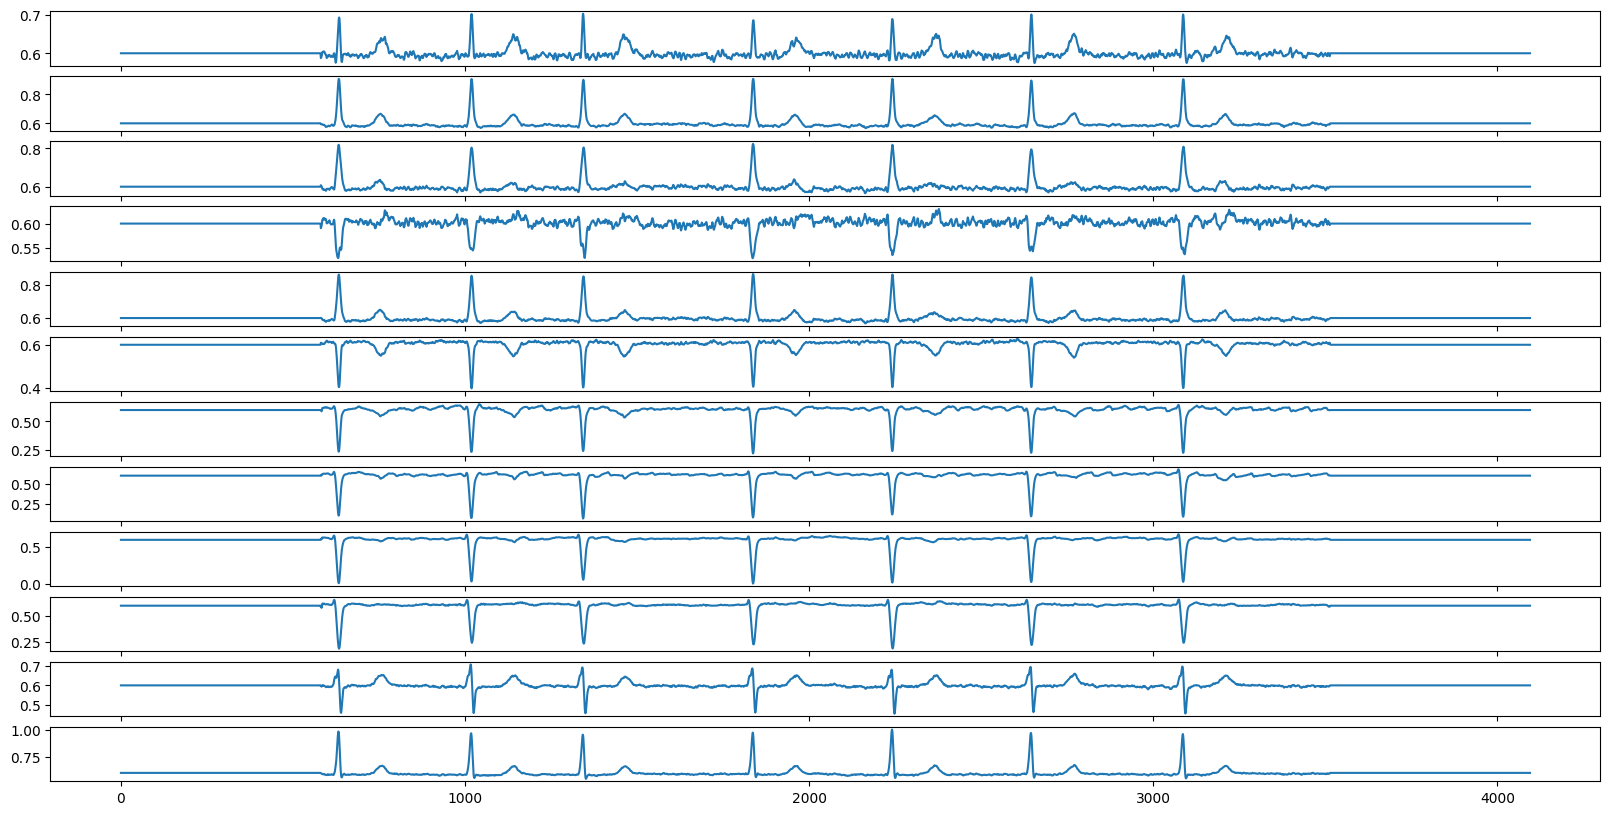

In [6]:
plt.figure(figsize=(20, 10))
ss = ecg['tracings'][120]
ss = normalize(np.array(ss))
for j in range(0,12):
    plt.subplot(12,1,j+1)
    plt.plot(ss[:,j])

In [7]:
ecg_trace = np.array(ecg_trace)
print(ecg_trace.shape)

(13, 4096, 12)


In [ ]:
with h5py.File(write_path + 'ecg_tracings_AF.hdf5', 'w') as f:
    f.create_dataset('tracings', data=ecg_trace)

    f.close()
#create readme
with open(write_path + 'readme.txt', 'w') as f:
    f.write('This is the AF data. The data is normalized. The data is a 3D array. The shape is (13, 4096, 12).')
    f.write('The first dimension is the number of data. The second dimension is the length of the data. The third dimension is the number of leads.')
    f.close()